# Machine Learning, Module 3
## **Non-Linear Classification**
All you need to know

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Kernelized SVM

In [2]:
from sklearn.datasets import make_blobs
import mglearn
#import matplotlib as plt
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

C:\Users\Behnam\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\Behnam\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.style.use('bmh')

Text(0, 0.5, 'Feature 1')

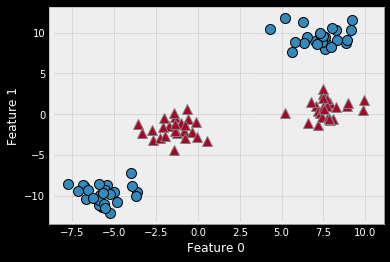

In [4]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

A linear model for classification can only separate points using a line,
and will not be able to do a very good job on this dataset 

Now let’s expand the set of input features, say by also adding
feature1 ** 2, the square of the second feature, as a new feature.
Instead of representing each data point as a two-dimensional point,
(feature0, feature1), we now represent it as a three-dimensional
point, (feature0, feature1, feature1 ** 2)

10

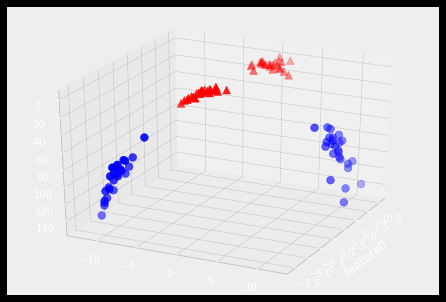

In [5]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',
marker='^',
cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
10

In the new representation of the data, it is now indeed possible to
separate the two classes using a linear model, a plane in three
dimensions.

In [6]:
plt.style.use('ggplot')

C:\Users\Behnam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

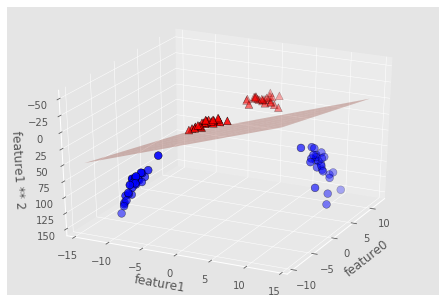

In [7]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In the new representation of the data, it is now indeed possible to
separate the two classes using a linear model, a plane in three
dimensions.

## Kernel Trick:


it works by directly computing the distance (more
precisely, the scalar products) of the data points for the expanded
feature representation, without ever actually computing the
expansion.

### Radial Basis Function (RBF) kernel  or Gaussian kernel:
The Gaussian kernel corresponds to an infinite-dimensional feature space.
One way to explain the Gaussian kernel is that it considers all
possible polynomials of all degrees, but the importance of the
features decreases for higher degrees

### support vectors:

During training, the SVM learns how important each of the training
data points is to represent the decision boundary between the two
classes. Typically only a subset of the training points matter for
defining the decision boundary: the ones that lie on the border
between the classes. These are called support vectors and give the
support vector machine its name


To make a prediction for a new point, the distance to each of the
support vectors is measured. A classification decision is made based
on the distances to the support vector, and the importance of the
support vectors that was learned during training (stored in the
`dual_coef_` attribute of SVC)

$$K_{gaussian}\left(x^{(i)},x^{(j)}\right) = exp\left(- \frac{\|x^{(i)}-x^{(j)}\|^2}{2\sigma^2}\right) = exp({\gamma}\|x^{(i)}-x^{(j)}\|^2)  $$

 - $ x^{(i)},x^{(j)} $ are data points
 
- $\|x^{(i)}-x^{(j)}\|^2$ denotes Euclideandistance 

-  𝜎 determines how fast the similarity metric decreases (to 0) as the examples are further apart.

- $\gamma$ (gamma) is a parameter that controls the width of the Gaussian kernel.

In [8]:
plt.style.use('ggplot')

Text(0, 0.5, 'Feature 1')

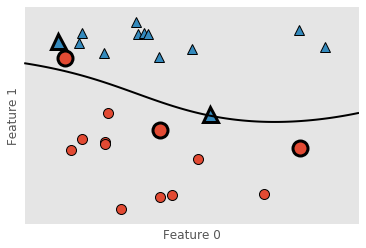

In [9]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5, )
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Tuning SVM parameters

### The gamma parameter:

is the one shown in the formula given in the
previous section, which controls the width of the Gaussian kernel. It
determines the scale of what it means for points to be close together.

### The $C$ parameter:

is a regularization parameter, similar to that used in
the linear models. It limits the importance of each point (or more
precisely, their dual_coef_).

In [10]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.style.use('bmh')

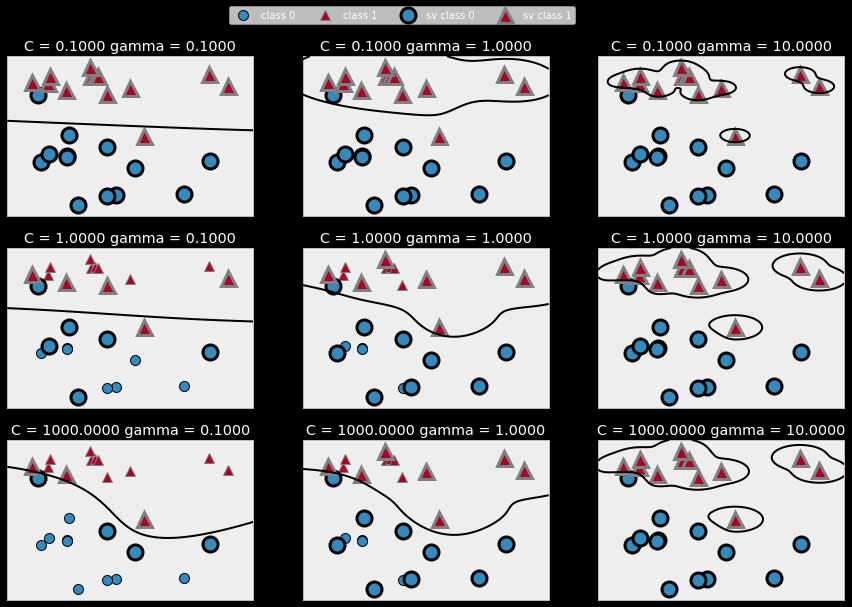

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

- A small gamma means a large radius for the Gaussian
kernel, which means that many points are considered close by. This
is reflected in very smooth decision boundaries on the left, and
boundaries that focus more on single points further to the right. 
- A low value of gamma means that the decision boundary will vary slowly,
which yields a model of low complexity, while a high value of gamma
yields a more complex model.


- a small C means a very restricted
model, where each data point can only have very limited influence.


- You can see that at the top left the decision boundary looks nearly
linear, with the misclassified points barely having any influence on
the line.

- Increasing C, as shown on the bottom right, allows these
points to have a stronger influence on the model and makes the
decision boundary bend to correctly classify them.

Let’s apply the RBF kernel SVM to the Breast Cancer dataset. By
default, C=1 and gamma=1/n_features

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC(C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale')

svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


In [14]:
svc.dual_coef_[0]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -0.09390862, -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -0.4637724 , -0.27408498, -1.        ,
       -0.03261955, -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -0.04019751, -1.        , -1.        ,
       -1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.  

### Preprocessing data for SVMs

In [15]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [16]:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [17]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


Scaling the data made a huge difference! Now we are actually in an
underfitting regime, where training and test set performance are
quite similar but less close to 100% accuracy. From here, we can try
increasing either C or gamma to fit a more complex model

In [18]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


# Another Example:

<h2 id="load_dataset">Load the Cancer data</h2>
The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

|Field name|Description|
|--- |--- |
|ID|Clump thickness|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign or malignant|

<br>
<br>

For the purposes of this example, we're using a dataset that has a relatively small number of predictors in each record. To download the data, we will use `!wget` to download it from IBM Object Storage.  
__Did you know?__ When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)

In [19]:
df = pd.read_csv(r"C:\Users\Behnam\Downloads\Python\Datasets\cell_samples.txt")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


The ID field contains the patient identifiers. The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

Lets look at the distribution of the classes based on Clump thickness and Uniformity of cell size:

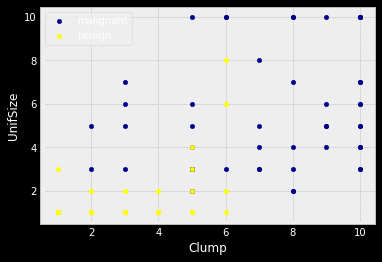

In [20]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
df[df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [21]:
df = pd.read_csv(r"C:\Users\Behnam\Downloads\Python\Datasets\cell_samples.txt")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [22]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [23]:
df['BareNuc'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

### 1st we need to take care of starnge values in 'BareNuc' column

In [24]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
#If ‘coerce’, then invalid parsing will be set as NaN, and then we keep only notNan rows
df['BareNuc'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [25]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [26]:
df['BareNuc'] = df['BareNuc'].astype('int64')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [27]:
df.isnull().any()

ID             False
Clump          False
UnifSize       False
UnifShape      False
MargAdh        False
SingEpiSize    False
BareNuc        False
BlandChrom     False
NormNucl       False
Mit            False
Class          False
dtype: bool

In [28]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, KBinsDiscretizer, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression, LinearRegression,  Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, hinge_loss, log_loss, mean_squared_error

In [29]:
df.shape

(683, 11)

In [30]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [31]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4, stratify = y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (478, 10) (478,)
Test set: (205, 10) (205,)


In [32]:
pipe = make_pipeline(MinMaxScaler(), PolynomialFeatures(), SVC())

param_grid = {'polynomialfeatures__degree' : [1,2, 3],
             'svc__C' : [ 0.1, 1, 10],
             'svc__gamma' : [0.01, 0.1, 1, 10],
             'svc__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'] 
                 }
grid = GridSearchCV(pipe, param_grid, cv= 5, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('minmaxscaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                 

In [33]:
grid.best_params_

{'polynomialfeatures__degree': 1,
 'svc__C': 0.1,
 'svc__gamma': 0.01,
 'svc__kernel': 'linear'}

In [34]:
scores = cross_validate(pipe, X, y, cv=2, n_jobs=-1, return_train_score=True, scoring='roc_auc' )
df_scores = pd.DataFrame(scores)
df_scores.mean()

fit_time       0.006485
score_time     0.004492
test_score     0.991453
train_score    0.995624
dtype: float64

,fit_time,score_time,test_score,train_score
0,0.005984,0.003989,0.989227,0.999356
1,0.006986,0.004996,0.993679,0.991892


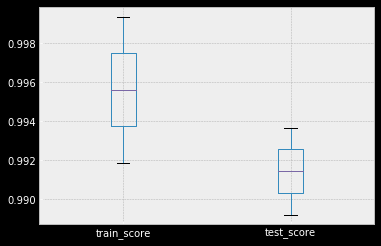

In [35]:
df_scores[['train_score', 'test_score' ]].boxplot()
df_scores

### You can also easily use the __f1_score__ from sklearn library:

In [36]:
y_pred = grid.predict(X_test)

In [37]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted') 

0.946254330304755

### Lets try jaccard index for accuracy:

In [38]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_pred)

C:\Users\Behnam\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.9463414634146341

### Comparing Randomforest with SVM

In [ ]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

param_grid = [
    {'classifier': [SVC()], 
     'preprocessing': [MinMaxScaler(), None],
     'classifier__gamma': [ 0.01, 0.1, 1, 10],
     'classifier__C': [ 0.01, 0.1, 1, 10 ],
     'classifier__kernel' : ['poly', 'rbf', 'sigmoid']},
    {'classifier': [RandomForestClassifier()],
     'preprocessing': [MinMaxScaler()], 
     'classifier__n_estimators' : [ 70, 100],
     'classifier__max_features': [2, 3]}]

grid = GridSearchCV(pipe, param_grid, cv= 3, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
scores = cross_validate(pipe, X, y, cv=2, n_jobs=-1, return_train_score=True, scoring='roc_auc' )
df_scores = pd.DataFrame(scores)
df_scores.mean()

In [ ]:
df_scores[['train_score', 'test_score' ]].boxplot()
df_scores